In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/test.csv
/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/train.csv


In [2]:
df=pd.read_csv("../input/fake-news/train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


**Get independent feature**

In [4]:
x=df.drop('label',axis=1)

In [5]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


**Get dependent feature**

In [6]:
y=df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
x.shape

(20800, 4)

In [11]:
df=df.dropna()

In [12]:
df.shape

(18285, 5)

In [17]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


**The 6th and 8th record is missing due to the deletion NaN records, we will try to re index that, so that will be useful for looping while processing the text**

# Text preprocessing

In [16]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [18]:
message=df.copy()

In [20]:
message.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [21]:
message.reset_index(inplace=True)

In [22]:
message.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


**Now all the indexes are in proper incremental order**

In [24]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
ps=PorterStemmer()
corpus=[]

for i in range(0,len(message)):
    review=re.sub('[^a-zA-Z]',' ',message['title'][i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [25]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilians killed single us airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathrooms exclusive video breitbart',
 'beno hamon wins french socialist party presidential nomination new york times',
 'back channel plan ukraine russia courtesy trump associates new york times',
 'obama organizing action partners soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewives isis causes outrage',
 'russian researchers discover secret nazi military base treasure hunter arctic photos',
 'us officials see link trump russia',
 'yes paid government trolls social media blogs forums websites',
 'major league soccer argentines find home success new york times',
 'wells fargo chief abruptly steps new york times',

**Bag of words model using CountVectorizer**

In [26]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
x=cv.fit_transform(corpus).toarray()

In [27]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
x.shape

(18285, 5000)

**Now x is having 5000 feature**

In [29]:
y=message['label']

# Train test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [34]:
cv.get_feature_names()[50:75]

['administration',
 'admiral',
 'admit',
 'admits',
 'admitted',
 'ads',
 'adults',
 'advance',
 'advice',
 'adviser',
 'advisor',
 'advocates',
 'affair',
 'affairs',
 'affordable',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'ag',
 'age',
 'agencies',
 'agency',
 'agenda']

In [35]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [36]:
a_df=pd.DataFrame(xtrain,columns=cv.get_feature_names())

In [37]:
a_df.head()

,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,absurd,...,youtube,zealand,zero,zika,zika virus,zionist,zone,zones,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Rows represent the sentences and columns represents the feature(words of high value(first 5000 feature) taken from the sentences)**

In [40]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinominal Naive Bayes algorithm

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
model=MultinomialNB()
model.fit(xtrain,ytrain)

MultinomialNB()

In [45]:
from sklearn.metrics import accuracy_score
import itertools
from sklearn.metrics import confusion_matrix

ypred=model.predict(xtest)
score=accuracy_score(ypred,ytest)
score*100

90.18321028165163

Confusion matrix, without normalization
[[1864  212]
 [ 147 1434]]


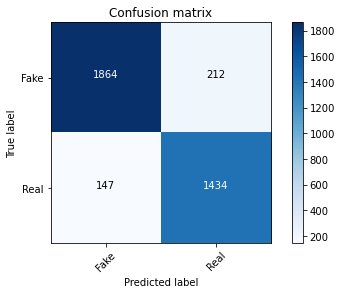

In [46]:
con=confusion_matrix(ytest,ypred)
plot_confusion_matrix(con,classes=['Fake','Real'])

# Passive agressive classifier

In [48]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [52]:
mod=PassiveAggressiveClassifier(n_iter_no_change=50)
mod.fit(xtrain,ytrain)

PassiveAggressiveClassifier(n_iter_no_change=50)

In [53]:
from sklearn.metrics import accuracy_score
import itertools
from sklearn.metrics import confusion_matrix

ypred=mod.predict(xtest)
score=accuracy_score(ypred,ytest)
score*100

91.85124418922615

Confusion matrix, without normalization
[[1911  165]
 [ 133 1448]]


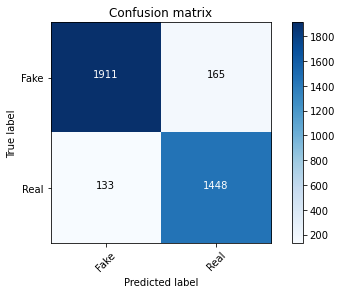

In [54]:
con=confusion_matrix(ytest,ypred)
plot_confusion_matrix(con,classes=['Fake','Real'])

**This algorithm works well with text data**

# Hyperparameter tuning with MultinomialNB

In [55]:
classifier=MultinomialNB(alpha=0.1)

In [59]:
from sklearn.metrics import accuracy_score
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(xtrain,ytrain)
    y_pred=sub_classifier.predict(xtest)
    score = accuracy_score(ytest, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8955427946404156
Alpha: 0.1, Score : 0.9018321028165163
Alpha: 0.2, Score : 0.9031993437243643
Alpha: 0.30000000000000004, Score : 0.9026524473612251
Alpha: 0.4, Score : 0.9015586546349467
Alpha: 0.5, Score : 0.9007383100902379
Alpha: 0.6000000000000001, Score : 0.9018321028165163
Alpha: 0.7000000000000001, Score : 0.9023789991796555
Alpha: 0.8, Score : 0.9026524473612251
Alpha: 0.9, Score : 0.9018321028165163


**we will see the top most real and fake words**

In [60]:
features=cv.get_feature_names()

In [62]:
features[:20]

['abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protests',
 'accidentally',
 'according',
 'account',
 'accounts']

In [66]:
classifier.coef_[0]

array([-10.11125026,  -8.56705287,  -9.16386895, ...,  -9.3921276 ,
        -8.56705287,  -9.68839341])

**Most real words**

In [68]:
sorted(zip(classifier.coef_[0],features),reverse=True)[:20]

[(-3.865653625500517, 'trump'),
 (-4.1964678505282045, 'hillary'),
 (-4.323545976434416, 'clinton'),
 (-4.963449837412125, 'election'),
 (-5.069864577717419, 'new'),
 (-5.196662264384798, 'comment'),
 (-5.220109997466371, 'us'),
 (-5.256345845920416, 'video'),
 (-5.324197214890652, 'hillary clinton'),
 (-5.341904627537581, 'fbi'),
 (-5.346380910750467, 'war'),
 (-5.490932231230607, 'obama'),
 (-5.54416459574547, 'world'),
 (-5.6237973273285355, 'donald'),
 (-5.647764921576737, 'russia'),
 (-5.672321097143953, 'donald trump'),
 (-5.729881741540563, 'america'),
 (-5.826575366343034, 'campaign'),
 (-5.878670478226436, 'wikileaks'),
 (-5.958140393521544, 'breaking')]

In [69]:
sorted(zip(classifier.coef_[0],features))[:20]

[(-10.858464666800117, 'abroad'),
 (-10.858464666800117, 'act new'),
 (-10.858464666800117, 'act new york'),
 (-10.858464666800117, 'actions'),
 (-10.858464666800117, 'advice'),
 (-10.858464666800117, 'agenda breitbart'),
 (-10.858464666800117, 'aleppo new'),
 (-10.858464666800117, 'aleppo new york'),
 (-10.858464666800117, 'ali'),
 (-10.858464666800117, 'america breitbart'),
 (-10.858464666800117, 'america new york'),
 (-10.858464666800117, 'americans breitbart'),
 (-10.858464666800117, 'amp'),
 (-10.858464666800117, 'amy'),
 (-10.858464666800117, 'amy schumer'),
 (-10.858464666800117, 'angeles'),
 (-10.858464666800117, 'anti semitism'),
 (-10.858464666800117, 'apologizes'),
 (-10.858464666800117, 'appearance'),
 (-10.858464666800117, 'approval')]